### Import libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("./data/dataset.csv", parse_dates=[3])
df.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


In [3]:
df.rename(columns={'SystemCodeNumber': 'Location', 'LastUpdated': 'Timestamp'}, inplace=True)
df['Day'] = df.Timestamp.dt.date
df['Month'] = df.Timestamp.dt.month
df['Hour'] = df.Timestamp.dt.hour

In [4]:
park = df[df.Location.isin(['Broad Street', 'NIA South'])]

In [5]:
park.head()

,Location,Capacity,Occupancy,Timestamp,Day,Month,Hour
20171,Broad Street,690,178,2016-10-04 07:59:42,2016-10-04,10,7
20172,Broad Street,690,269,2016-10-04 08:25:42,2016-10-04,10,8
20173,Broad Street,690,415,2016-10-04 08:59:42,2016-10-04,10,8
20174,Broad Street,690,530,2016-10-04 09:32:46,2016-10-04,10,9
20175,Broad Street,690,600,2016-10-04 09:59:48,2016-10-04,10,9


### Intro Visuals

### Basics

In [8]:
sns.set_style('dark')

In [9]:
months = [pd.datetime(2016, 10, 1), 
          pd.datetime(2016, 11, 1), 
          pd.datetime(2016, 12, 1)]
plt.rc('date.autoformatter', day='%b %Y');

/Users/rk0291db/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.
/Users/rk0291db/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/Users/rk0291db/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


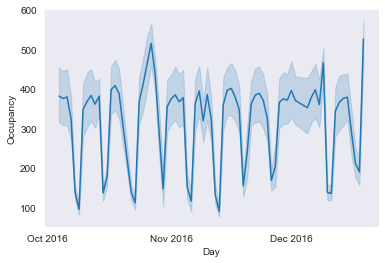

In [11]:
sns.lineplot(data = park, x = 'Day', y = 'Occupancy')
plt.xticks(months);

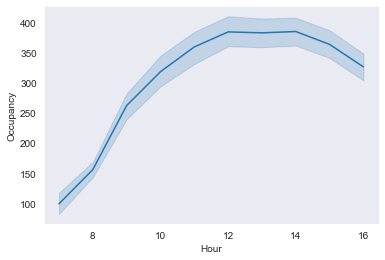

In [12]:
sns.lineplot(data = park, x = 'Hour', y = 'Occupancy');

### Bootstrapping

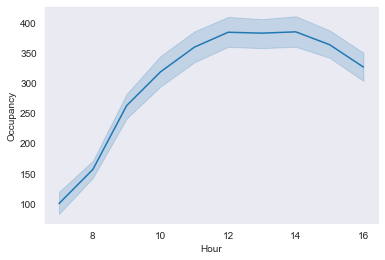

In [14]:
sns.lineplot(data = park, x='Hour', y='Occupancy', n_boot=1000);
# number of bootstrap samples to create by default is 1000, 
# you can change it by using n_boot

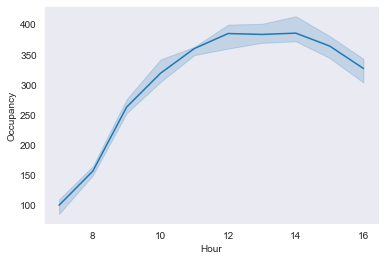

In [15]:
sns.lineplot(data = park, x = 'Hour', y = 'Occupancy', n_boot=10);

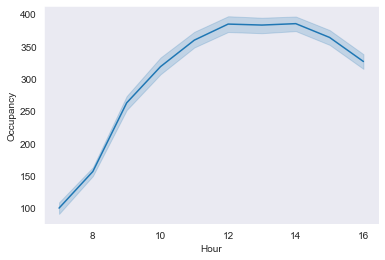

In [16]:
sns.lineplot(data = park, x = 'Hour', y = 'Occupancy', ci=68);
# you can change how big the confidence interval should be with 
# ci, default is ci = 95

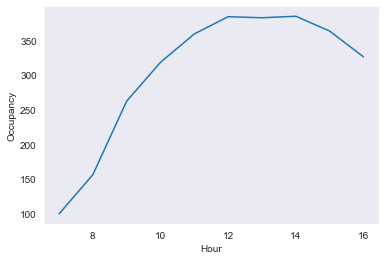

In [17]:
sns.lineplot(data = park, x = 'Hour', y = 'Occupancy', ci=None);

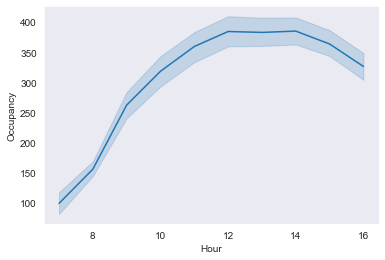

In [18]:
sns.lineplot(data = park, x = 'Hour', y = 'Occupancy', estimator='mean');
# accessing estimator argument to look at other aggregate functions


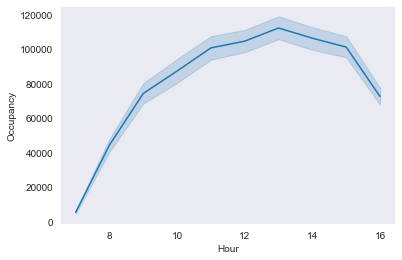

In [19]:
sns.lineplot(data = park, x = 'Hour', y = 'Occupancy', estimator = 'sum');

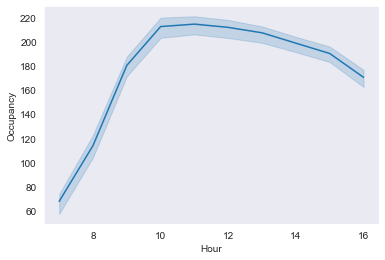

In [20]:
sns.lineplot(data = park, x = 'Hour', y = 'Occupancy', estimator = 'std');

### Visual Semantics

#### Hue

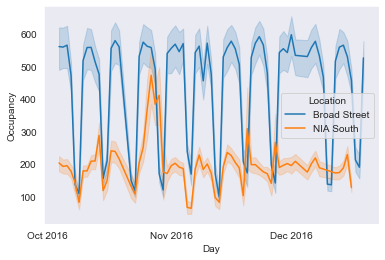

In [22]:
# additional info to show using visual semantics
sns.lineplot(data = park, x = 'Day', y = 'Occupancy', hue = 'Location')

plt.xticks(months);

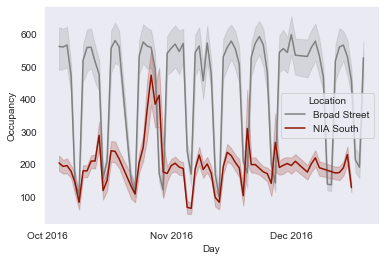

In [23]:
sns.lineplot(data=park, x='Day', y='Occupancy', hue='Location', palette = ['gray', 'xkcd:brick red'])

plt.xticks(months);

#### Style

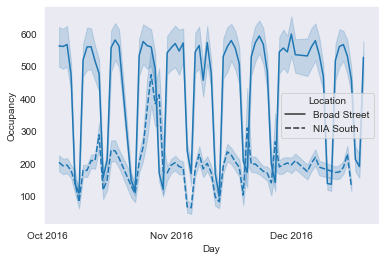

In [24]:
sns.lineplot(data = park, x = 'Day', y = 'Occupancy', style = 'Location')

plt.xticks(months);

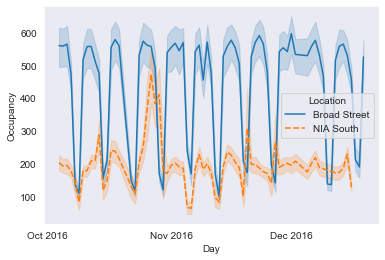

In [25]:
sns.lineplot(data = park, x = 'Day', y = 'Occupancy', hue = "Location", style = 'Location')

plt.xticks(months);

#### Size

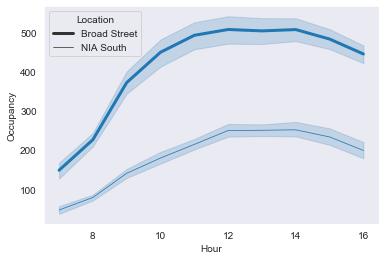

In [27]:
sns.lineplot(x='Hour', y='Occupancy', data=park, size='Location',
            );

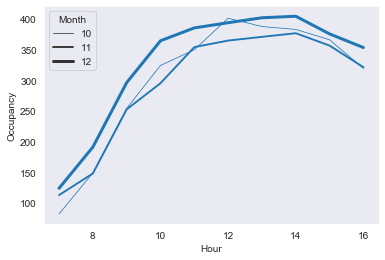

In [28]:
sns.lineplot(x='Hour', y='Occupancy', data=park, ci=None,
             size='Month'
            );

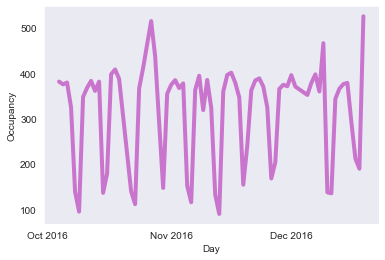

In [26]:
sns.lineplot(x='Day', y='Occupancy', data=park, ci=None, 
             lw=4,
             color='#aa00aa',
             alpha=0.5
            )
# adjust transparency with alpha
plt.xticks(months);